# <center>Ambition Box<center>

## Problem Statement
- **Job seekers in India find it difficult to identify the best companies and industries because real-time information on hiring, job security, work-life balance, and career growth is scattered across platforms like AmbitionBox. Since these factors are not evaluated based on their importance, comparing companies becomes challenging. This project solves the problem by using a weighted data analysis approach to rank companies and industries, helping job seekers and stakeholders make better, data-driven decisions.**

## What We Observed from 2000 Companies (Based on Employee-Reported Data)

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import time
import warnings

warnings.filterwarnings("ignore")

options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
options.add_argument("--disable-notifications")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)

title=[]
rating=[]
c_type=[]
headoffice=[]
operations_spread=[]
job_openings=[]
h_rate=[]
c_rate=[]
reviews=[]

for page_no in range(1, 101):
    print(f"Scraping page {page_no}")
    
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={page_no}"
    driver.get(url)
    time.sleep(4)

    soup = BeautifulSoup(driver.page_source, "html.parser")

    cards = soup.find_all("div", class_="companyCardWrapper")

    for card in cards:


        name = card.find("a", class_="companyCardWrapper__companyName")
        title.append(name.text.strip() if name else np.nan)


        rat = card.find("div", class_="rating_star_container")
        rating.append(rat.text.strip() if rat else np.nan)


        info = card.find("span", class_="companyCardWrapper__interLinking")
        text = info.text.strip() if info else ""

        typ = re.findall(r"(\w.+)\|", text)
        c_type.append(typ[0] if typ else np.nan)

        loc = re.findall(r"(?:\|\s*|^)([A-Za-z\s]+?)(?:\s*/|\s*\+|$)", text)
        headoffice.append(loc[0] if loc else np.nan)

        spread = re.findall(r"\+(\d+)\s+other\s+locations", text)
        operations_spread.append(int(spread[0]) + 1 if spread else np.nan)

        
        jobs_value = np.nan
        for tag in card.find_all("a", class_="companyCardWrapper__ActionWrapper"):
            text = tag.text.strip()
            job = re.findall(r"(\S+)\sJobs", text)
            if job:
                jobs_value = job[0]
                break
        job_openings.append(jobs_value)

        
        rating_block = card.find("div", class_="companyCardWrapper__ratingComparisonWrapper")
        rating_text = rating_block.text.strip() if rating_block else ""

        high = re.search(r"Highly Rated For (.*?)(?:Critically Rated For|$)", rating_text)
        h_rate.append(high.group(1).strip() if high else np.nan)

        crit = re.search(r"Critically Rated For (.*)", rating_text)
        c_rate.append(crit.group(1).strip() if crit else np.nan)

        rev = card.find("span", class_="companyCardWrapper__companyRatingCount")
        rev_text = rev.text.strip() if rev else ""
        rev_match = re.search(r"\d+(?:\.\d+)?[kL]?", rev_text)
        reviews.append(rev_match.group() if rev_match else np.nan)

driver.quit()

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Scraping page 37
Scraping page 38
Scraping page 39
Scraping page 40
Scraping page 41
Scraping page 42
Scraping page 43
Scraping page 44
Scraping page 45
Scraping page 46
Scraping page 47
Scraping page 48
Scraping page 49
Scraping page 50
Scraping page 51
Scraping page 52
Scraping page 53
Scraping page 54
Scraping page 55
Scraping page 56
Scraping page 57
Scraping page 58
Scraping page 59
Scrapi

## Confirm all columns have equal length

In [2]:
print(f"Titles: {len(title)}")
print(f"Ratings: {len(rating)}")
print(f"Company Type: {len(c_type)}")
print(f"Headoffice: {len(headoffice)}")
print(f"Operations Spread: {len(operations_spread)}")
print(f"Job Openings: {len(job_openings)}")
print(f"Highly Rated: {len(h_rate)}")
print(f"Critically Rated: {len(c_rate)}")
print(f"Reviews: {len(reviews)}")

Titles: 2000
Ratings: 2000
Company Type: 2000
Headoffice: 2000
Operations Spread: 2000
Job Openings: 2000
Highly Rated: 2000
Critically Rated: 2000
Reviews: 2000


## Creating a Dataframe

In [32]:
import pandas as pd
df = pd.DataFrame({
    "Company Name": title,
    "Industry Type": c_type,
    "Primary Office Location": headoffice,
    "Operating Locations": operations_spread,
    "Job Openings": job_openings,
    "Total Reviews": reviews,
    "Overall Rating": rating,
    "Highly Rated": h_rate,
    "Critically Rated": c_rate
})

In [33]:
df

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Highly Rated,Critically Rated
0,TCS,IT Services & Consulting,Bangalore,440.0,2.1k,1.1L,3.3,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor..."
1,Accenture,IT Services & Consulting,Bangalore,256.0,40.6k,71.3k,3.7,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
2,Wipro,IT Services & Consulting,Hyderabad,371.0,6.9k,63.5k,3.6,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
3,Cognizant,IT Services & Consulting,Hyderabad,230.0,709,59.8k,3.6,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
4,Capgemini,IT Services & Consulting,Bangalore,184.0,1.9k,51.4k,3.7,"Work Life Balance, Job Security","Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...,...,...,...,...
1995,Zolo,Internet,Bangalore,25.0,12,530,3.3,NaN,"Promotions / Appraisal, Company Culture, Work ..."
1996,DM Immigration Consultant,Other,Bangalore,4.0,--,529,1.0,NaN,"Company Culture, Work Life Balance, Work Satis..."
1997,Anudip Foundation,Non-Profit,Kolkata,63.0,26,529,3.7,Work Life Balance,"Promotions / Appraisal, Job Security"
1998,Micron Electricals,Engineering & Construction,Bangalore,19.0,2,527,4.0,"Job Security, Skill Development / Learning, Wo...",Promotions / Appraisal


## Saving the raw dataset

In [34]:
df.to_csv(r"D:\Web Scraping\ambitionbox_raw_dataset.csv", index=False)

## Quick preview

In [35]:
df.head(5)

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Highly Rated,Critically Rated
0,TCS,IT Services & Consulting,Bangalore,440.0,2.1k,1.1L,3.3,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor..."
1,Accenture,IT Services & Consulting,Bangalore,256.0,40.6k,71.3k,3.7,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
2,Wipro,IT Services & Consulting,Hyderabad,371.0,6.9k,63.5k,3.6,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
3,Cognizant,IT Services & Consulting,Hyderabad,230.0,709,59.8k,3.6,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
4,Capgemini,IT Services & Consulting,Bangalore,184.0,1.9k,51.4k,3.7,"Work Life Balance, Job Security","Promotions / Appraisal, Salary & Benefits"


In [36]:
df.shape

(2000, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company Name             2000 non-null   object 
 1   Industry Type            1984 non-null   object 
 2   Primary Office Location  2000 non-null   object 
 3   Operating Locations      1999 non-null   float64
 4   Job Openings             2000 non-null   object 
 5   Total Reviews            2000 non-null   object 
 6   Overall Rating           2000 non-null   object 
 7   Highly Rated             1311 non-null   object 
 8   Critically Rated         1585 non-null   object 
dtypes: float64(1), object(8)
memory usage: 140.8+ KB


## EDA

### Create new column "Job Security" based on presence of "Job Security" in the "Highly Rated" & "Critically Rated" columns

In [38]:
df["Job Security"] = np.select(
    [
        df["Highly Rated"].str.contains("Job Security", na=False),
        df["Critically Rated"].str.contains("Job Security", na=False)
    ],
    [
        "High",  
        "Low"     
    ],
    default="Medium"  
)

### Create new column "Work Life Balance" based on presence of "Work Life Balance" in the "Highly Rated" & "Critically Rated" columns

In [39]:
df["Work Life Balance"] = np.select(
    [
        df["Highly Rated"].str.contains("Work Life Balance", na=False),
        df["Critically Rated"].str.contains("Work Life Balance", na=False)
    ],
    [
        "High",    
        "Low"     
    ],
    default="Medium"  
)

### Create new column "Work Satisfaction" based on presence of "Work Satisfaction" in the "Highly Rated" & "Critically Rated" columns

In [40]:
df["Work Satisfaction"] = np.select(
    [
        df["Highly Rated"].str.contains("Work Satisfaction", na=False),
        df["Critically Rated"].str.contains("Work Satisfaction", na=False)
    ],
    [
        "High",   
        "Low"     
    ],
    default="Medium"   
)

### Create new column "Promotions" based on presence of "Promotions/Appraisal" in the "Highly Rated" & "Critically Rated" columns


In [41]:
df["Promotions"] = np.select(
    [
        df["Highly Rated"].str.contains("Promotions", na=False),
        df["Critically Rated"].str.contains("Promotions", na=False)
    ],
    [
        "High",  
        "Low"     
    ],
    default="Medium"  
)

In [42]:
df.head()

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Highly Rated,Critically Rated,Job Security,Work Life Balance,Work Satisfaction,Promotions
0,TCS,IT Services & Consulting,Bangalore,440.0,2.1k,1.1L,3.3,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor...",High,Medium,Low,Low
1,Accenture,IT Services & Consulting,Bangalore,256.0,40.6k,71.3k,3.7,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",Medium,Medium,Low,Low
2,Wipro,IT Services & Consulting,Hyderabad,371.0,6.9k,63.5k,3.6,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",Medium,Medium,Low,Low
3,Cognizant,IT Services & Consulting,Hyderabad,230.0,709,59.8k,3.6,NaN,"Promotions / Appraisal, Salary & Benefits, Wor...",Medium,Medium,Low,Low
4,Capgemini,IT Services & Consulting,Bangalore,184.0,1.9k,51.4k,3.7,"Work Life Balance, Job Security","Promotions / Appraisal, Salary & Benefits",High,High,Medium,Low


## Data Cleaning

In [43]:
df = df.drop(columns=["Highly Rated", "Critically Rated"])

In [44]:
def clean_column(col):
    col = col.astype(str).str.strip()
    
    col = col.replace(['--', 'nan', 'NaN', 'None', ''], '0')
    
    def convert(x):
        x = x.lower()
        if 'l' in x:                 
            return float(x.replace('l', '')) * 100000
        elif 'k' in x:              
            return float(x.replace('k', '')) * 1000
        else:
            return float(x)
    
    return col.apply(convert)

df["Job Openings"] = clean_column(df["Job Openings"]).fillna(0).astype(int)
df["Total Reviews"] = clean_column(df["Total Reviews"]).fillna(0).astype(int)
df["Operating Locations"] = df["Operating Locations"].fillna(0).astype(int)

In [45]:
df['Industry Type'] = df['Industry Type'].astype(str).str.strip().replace('nan', 'Other') 

In [46]:
df['Overall Rating'] = df['Overall Rating'].astype(float)

In [47]:
df[['Industry Type','Primary Office Location', 'Job Security', 'Work Life Balance',	'Work Satisfaction', 'Promotions']] = \
df[['Industry Type','Primary Office Location', 'Job Security', 'Work Life Balance',	'Work Satisfaction', 'Promotions']].astype('category')

In [48]:
ambition = df
ambition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Company Name             2000 non-null   object  
 1   Industry Type            2000 non-null   category
 2   Primary Office Location  2000 non-null   category
 3   Operating Locations      2000 non-null   int64   
 4   Job Openings             2000 non-null   int64   
 5   Total Reviews            2000 non-null   int64   
 6   Overall Rating           2000 non-null   float64 
 7   Job Security             2000 non-null   category
 8   Work Life Balance        2000 non-null   category
 9   Work Satisfaction        2000 non-null   category
 10  Promotions               2000 non-null   category
dtypes: category(6), float64(1), int64(3), object(1)
memory usage: 98.1+ KB


In [49]:
ambition.head(5)

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Job Security,Work Life Balance,Work Satisfaction,Promotions
0,TCS,IT Services & Consulting,Bangalore,440,2100,110000,3.3,High,Medium,Low,Low
1,Accenture,IT Services & Consulting,Bangalore,256,40600,71300,3.7,Medium,Medium,Low,Low
2,Wipro,IT Services & Consulting,Hyderabad,371,6900,63500,3.6,Medium,Medium,Low,Low
3,Cognizant,IT Services & Consulting,Hyderabad,230,709,59800,3.6,Medium,Medium,Low,Low
4,Capgemini,IT Services & Consulting,Bangalore,184,1900,51400,3.7,High,High,Medium,Low


### Save the cleaned dataset to CSV

In [50]:
ambition.to_csv(r"D:\Web Scraping\ambitionbox_cleaned_dataset.csv", index=False)
print("DataFrame created and saved as 'ambitionbox_cleaned_dataset.csv'")

DataFrame created and saved as 'ambitionbox_cleaned_dataset.csv'


# Univariate Non Visual Analysis

## Discrete / Category columns

In [54]:
cat_df = ambition.select_dtypes(include=['category'])

In [55]:
cat_df.head()

,Industry Type,Primary Office Location,Job Security,Work Life Balance,Work Satisfaction,Promotions
0,IT Services & Consulting,Bangalore,High,Medium,Low,Low
1,IT Services & Consulting,Bangalore,Medium,Medium,Low,Low
2,IT Services & Consulting,Hyderabad,Medium,Medium,Low,Low
3,IT Services & Consulting,Hyderabad,Medium,Medium,Low,Low
4,IT Services & Consulting,Bangalore,High,High,Medium,Low


In [56]:
def analyze_categorical(ambition):
    cat_cols = ambition.select_dtypes(include=['category']).columns
    for col in cat_cols:
        print(f"\n {"*"*10}, Categorical Column: {col} ,{"*"*10} ")
        print(f"Count: {ambition[col].count()}")
        print(f"Number of Unique Values: {ambition[col].nunique()}")
        print(f"Most Frequent Value (Mode): {ambition[col].mode().iloc[0]} ({ambition[col].value_counts(normalize=True).iloc[0]*100:.2f}%)")
        print("Top 5 Frequent Values:")
        print(ambition[col].value_counts().head())

In [57]:
analyze_categorical(ambition)


 **********, Categorical Column: Industry Type ,********** 
Count: 2000
Number of Unique Values: 75
Most Frequent Value (Mode): IT Services & Consulting (12.50%)
Top 5 Frequent Values:
Industry Type
IT Services & Consulting      250
Auto Components               117
Engineering & Construction    100
Internet                       78
Pharma                         77
Name: count, dtype: int64

 **********, Categorical Column: Primary Office Location ,********** 
Count: 2000
Number of Unique Values: 113
Most Frequent Value (Mode): Bangalore (19.35%)
Top 5 Frequent Values:
Primary Office Location
Bangalore    387
Mumbai       353
Chennai      180
Pune         178
Gurgaon      175
Name: count, dtype: int64

 **********, Categorical Column: Job Security ,********** 
Count: 2000
Number of Unique Values: 3
Most Frequent Value (Mode): Medium (47.90%)
Top 5 Frequent Values:
Job Security
Medium    958
High      670
Low       372
Name: count, dtype: int64

 **********, Categorical Column: Work L

# What We Observed from 2000 Companies (Categorical Insights)
- **IT Services & Consulting dominates the dataset (12.5%)**, highlighting the strong influence of the technology sector, followed by Auto Components, Engineering & Construction, Internet, and Pharma.
- **Bangalore emerges as the leading corporate hub (19.35%)**, with Mumbai, Chennai, Pune, and Gurgaon also playing major roles—confirming the dominance of metro cities in employment generation.
- **Job Security is mostly rated as ‘Medium’ (47.9%)**, with a significant share rated ‘High’ (33.5%), indicating overall stability but limited long-term security assurance.
- **Work-Life Balance is primarily rated ‘Medium’ (51.15%)**, suggesting employees manage work demands reasonably well, though improvements in flexibility and personal well-being are still needed.
- **Work Satisfaction remains largely ‘Medium’ (71.15%)**, showing that most employees are moderately satisfied but not highly engaged or enthusiastic.
- **Promotions are overwhelmingly rated ‘Low’ (76.8%)**, making limited career growth and appraisal opportunities the most critical concern across organizations.

## Continuous / Numerical columns

In [58]:
num_df = ambition.select_dtypes(include='number')

In [59]:
num_df.head()

,Operating Locations,Job Openings,Total Reviews,Overall Rating
0,440,2100,110000,3.3
1,256,40600,71300,3.7
2,371,6900,63500,3.6
3,230,709,59800,3.6
4,184,1900,51400,3.7


In [60]:
def analyze_numerical(ambition):
    num_cols = ambition.select_dtypes(include='number').columns
    for col in num_cols:
        print(f"\n--- Numerical Column: {col} ---")
        print(f"Count: {ambition[col].count()}")
        print(f"Minimum: {ambition[col].min()}")
        print(f"Maximum: {ambition[col].max()}")
        print(f"Mean: {ambition[col].mean()}")
        print(f"Median: {ambition[col].median()}")
        print(f"Standard Deviation: {ambition[col].std()}")
        print(f"Variance: {ambition[col].var()}")
        print(f"Skewness: {ambition[col].skew()}")
        print(f"Kurtosis: {ambition[col].kurt()}")

In [61]:
analyze_numerical(ambition)


--- Numerical Column: Operating Locations ---
Count: 2000
Minimum: 0
Maximum: 1904
Mean: 107.6405
Median: 62.0
Standard Deviation: 148.42911729569974
Variance: 22031.20286118059
Skewness: 4.755010615386561
Kurtosis: 35.59692875553037

--- Numerical Column: Job Openings ---
Count: 2000
Minimum: 0
Maximum: 40600
Mean: 83.314
Median: 10.0
Standard Deviation: 953.5982750818711
Variance: 909349.6702391198
Skewness: 38.87808503930464
Kurtosis: 1635.2023448255934

--- Numerical Column: Total Reviews ---
Count: 2000
Minimum: 525
Maximum: 110000
Mean: 2180.727
Median: 1000.0
Standard Deviation: 5174.685770545198
Variance: 26777372.82388294
Skewness: 10.434754825076036
Kurtosis: 148.97782064768842

--- Numerical Column: Overall Rating ---
Count: 2000
Minimum: 1.0
Maximum: 5.0
Mean: 3.7921000000000005
Median: 3.8
Standard Deviation: 0.3513250697748826
Variance: 0.12342930465232614
Skewness: -0.7784674569684368
Kurtosis: 4.0981295356268035


# What We Observed from 2000 Companies (Numerical Insights)
- **Operating Locations are highly right-skewed**  
  **While a few companies operate across thousands of locations (maximum: 1,904), the majority have a limited presence**, with a median of only 62 locations—indicating that large geographic networks are uncommon.
  
- **Job Openings are extremely concentrated among a few companies**  
  **Despite a low median of 10 openings, the maximum reaches 40,600, showing that a very small number of organizations dominate hiring activity**, while most companies recruit at a minimal scale.

- **Total Reviews are heavily skewed toward large employers**  
  **Although the mean review count is around 2,181, most companies have closer to 1,000 reviews**, implying that employee feedback and visibility are concentrated among a few well-known firms.

- **Overall Ratings are relatively stable and moderately high**  
  **Ratings are tightly clustered around a mean of 3.79 and a median of 3.8**, suggesting that **employee satisfaction is generally consistent and leans toward the positive side**, with fewer extreme low or high values.

## Bivariate Non Visual Analysis

### Performs non-visual bivariate analysis for all column pairs in the DataFrame.
### - Num-Num: Shows correlation
### - Cat-Num Groupby, pivot
### - Cat-Cat: Crosstab counts

## Numeric–Numeric (Correlation)

In [64]:
num_df.corr()

,Operating Locations,Job Openings,Total Reviews,Overall Rating
Operating Locations,1.000000,0.069268,0.476883,0.135182
Job Openings,0.069268,1.000000,0.425168,-0.019078
Total Reviews,0.476883,0.425168,1.000000,-0.019351
Overall Rating,0.135182,-0.019078,-0.019351,1.000000


## Cat-Num (groupby, pivot table) 

In [65]:
pd.pivot_table(ambition, index='Industry Type',observed=False, columns='Job Security', values='Overall Rating', aggfunc='mean', fill_value=0).head(5)

Job Security,High,Low,Medium
Industry Type,,,
Accounting & Auditing,0.000000,0.00,3.375000
Agriculture,3.850000,0.00,4.200000
Agro Chemicals,4.033333,3.60,3.733333
Analytics & KPO,3.850000,2.78,3.584615
Architecture & Interior Design,0.000000,3.30,0.000000


### Avg. Overall Rating by Industry

In [66]:
ambition.groupby('Industry Type', observed=False)['Overall Rating'].mean().sort_values(ascending=False).head(5)

Industry Type
Railways               4.200
Sports & Recreation    4.200
Defence & Aerospace    4.130
Government             4.125
Fitness & Wellness     4.075
Name: Overall Rating, dtype: float64

### Example: Crosstab between 'Promotions' and 'Work Satisfaction'

In [67]:
pd.crosstab(ambition['Promotions'], ambition['Work Satisfaction'], margins=True)

Work Satisfaction,High,Low,Medium,All
Promotions,,,,
High,0,0,4,4
Low,63,382,1091,1536
Medium,101,31,328,460
All,164,413,1423,2000


In [68]:
ambition[ambition['Promotions']=="High"]

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Job Security,Work Life Balance,Work Satisfaction,Promotions
7,ICICI Bank,Banking,Mumbai,1438,22,45100,4.0,High,Medium,Medium,High
109,Manappuram Finance,NBFC,Bangalore,651,3,5600,3.9,Medium,High,Medium,High
957,Asirvad Microfinance,NBFC,Chennai,309,12,1100,3.8,Medium,Medium,Medium,High
1846,Gandhi Automations,Industrial Machinery,Mumbai,25,16,573,4.0,High,Medium,Medium,High


# Univariate visual analysis

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

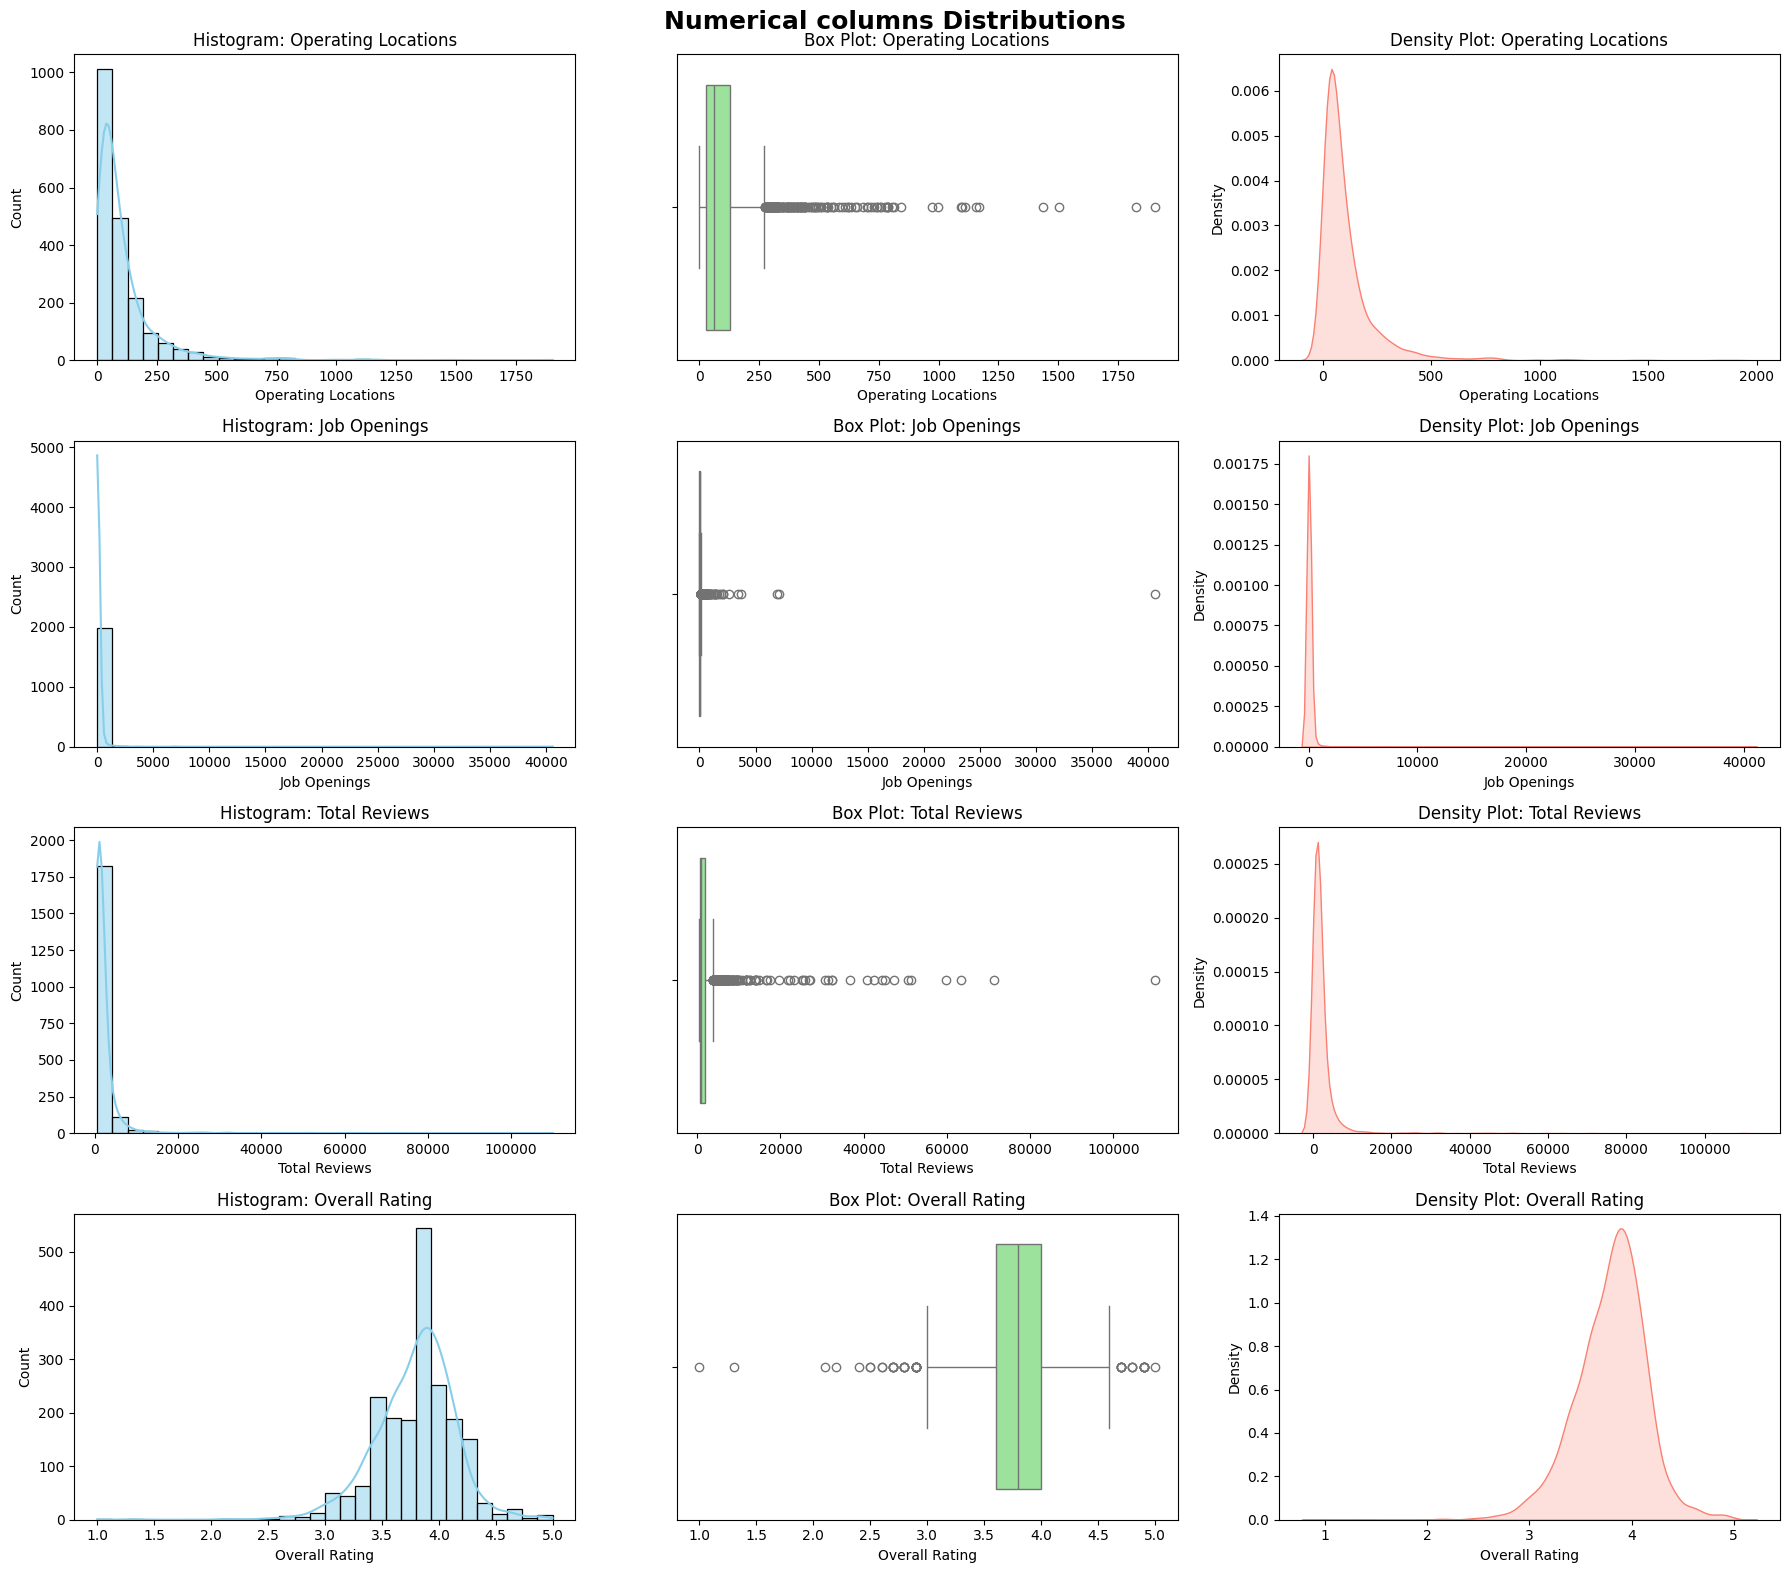

In [71]:
num_cols = ambition.select_dtypes(include='number').columns

plt.figure(figsize=(18, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 3, 3 * (i - 1) + 1)
    sns.histplot(ambition[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram: {col}')

    plt.subplot(len(num_cols), 3, 3 * (i - 1) + 2)
    sns.boxplot(x=ambition[col], color='lightgreen')
    plt.title(f'Box Plot: {col}')

    plt.subplot(len(num_cols), 3, 3 * (i - 1) + 3)
    sns.kdeplot(ambition[col], fill=True, color='salmon')
    plt.title(f'Density Plot: {col}')

plt.suptitle("Numerical columns Distributions", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

# Key Insights from 2000 Companies (Numerical Distributions)

- **Most companies have a limited operational footprint**  
  The distribution of operating locations is heavily right-skewed, with most companies operating in a small number of locations, while only a handful have an extensive presence across hundreds or thousands of locations.

- **Hiring activity is generally low with extreme outliers**  
  Job openings are concentrated near zero, indicating that most companies are hiring at a modest level, while a very small number of organizations show exceptionally high recruitment volumes, making them clear outliers.

- **Employee review counts are dominated by a few large companies**  
  The majority of firms have relatively low review counts, whereas a small number of well-known companies accumulate very high reviews, highlighting unequal visibility and engagement across organizations.

- **Overall employee ratings remain stable and centrally distributed**  
  Ratings are tightly clustered between 3.5 and 4.0, with a near-normal distribution, indicating consistent and moderately positive employee satisfaction across most companies, and very few extreme ratings.

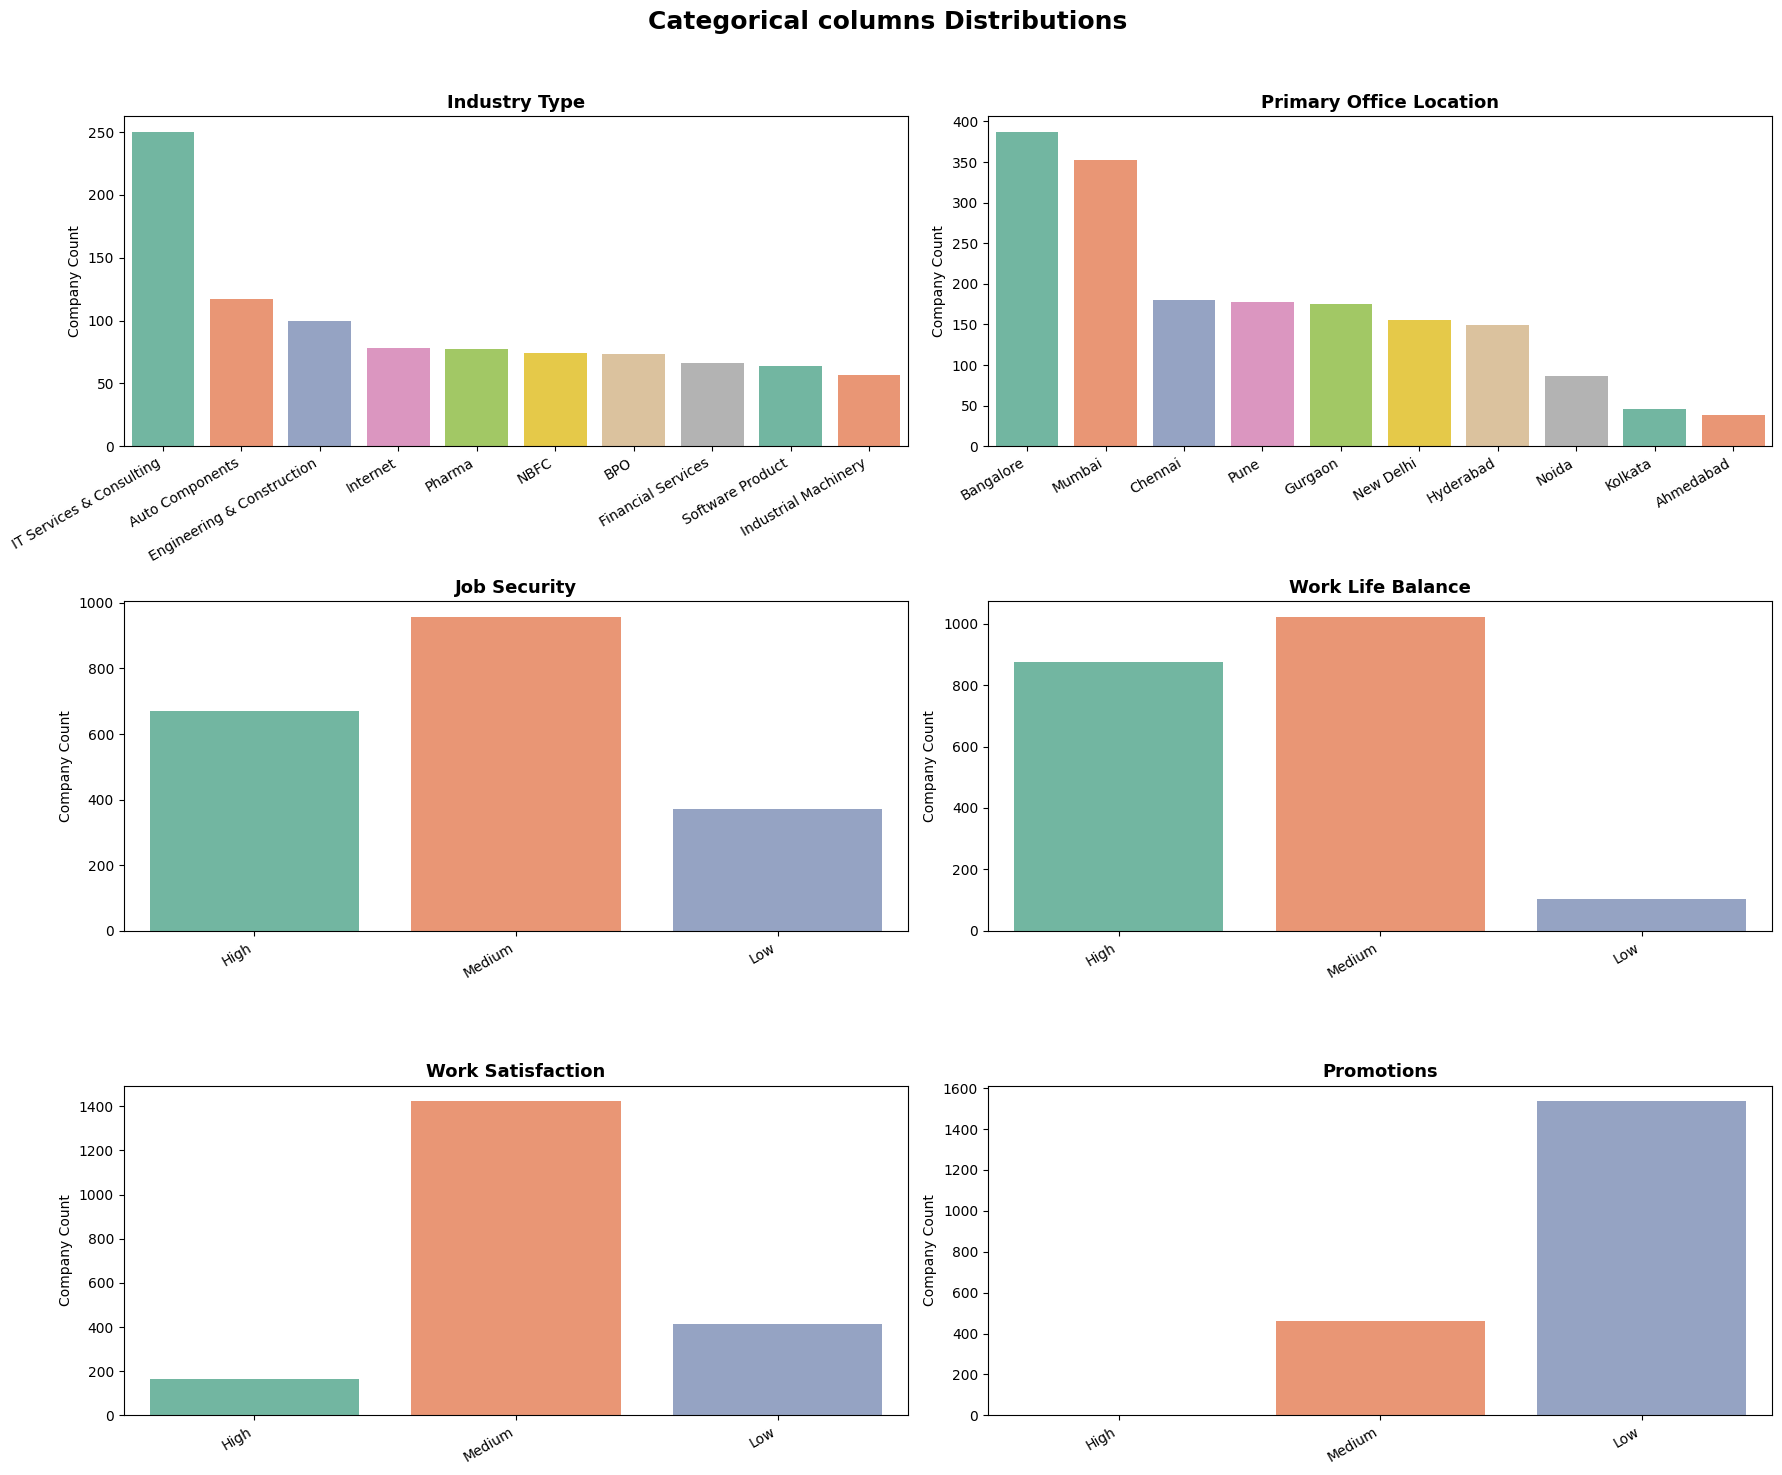

In [72]:
cat_cols = [
    'Industry Type',
    'Primary Office Location',
    'Job Security',
    'Work Life Balance',
    'Work Satisfaction',
    'Promotions'
]

ordinal_order = ['High', 'Medium', 'Low']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]

    if col in ['Industry Type', 'Primary Office Location']:
        # Show only Top 10
        top_values = ambition[col].value_counts().nlargest(10).index
        plot_data = ambition[ambition[col].isin(top_values)]
        order = top_values
    else:
        plot_data = ambition
        order = ordinal_order  

    sns.countplot(data=plot_data, x=col, order=order, palette='Set2', ax=ax)
    
    ax.set_title(f"{col}", fontsize=13, weight='bold')
    ax.set_ylabel("Company Count")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Clean up extra axes
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical columns Distributions", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Key Insights from 2000 Companies (Categorical Distributions)

- **IT Services & Consulting clearly leads the industry distribution**, followed by Auto Components, Engineering & Construction, Internet, and Pharma—showing a strong dominance of technology and industrial sectors in the dataset.

- **Bangalore and Mumbai emerge as the top primary office locations**, with Chennai, Pune, and Gurgaon also showing strong representation—reinforcing the dominance of major metropolitan cities as corporate hubs.

- **Job Security is predominantly rated as ‘Medium’, with a substantial number of companies also rated ‘High’**, indicating that most organizations provide reasonable employment stability.

- **Work-Life Balance is largely concentrated in the ‘Medium’ category**, suggesting that while extreme dissatisfaction is rare, many companies still offer only average flexibility and balance.

- **Work Satisfaction is overwhelmingly rated as ‘Medium’**, highlighting that employees are generally content but not highly engaged or exceptionally satisfied.

- **Promotions are mostly rated as ‘Low’**, with very few companies offering high promotion opportunities—pointing to limited career growth and slow appraisal cycles across organizations.

### Do promotions improve job/work satisfaction?

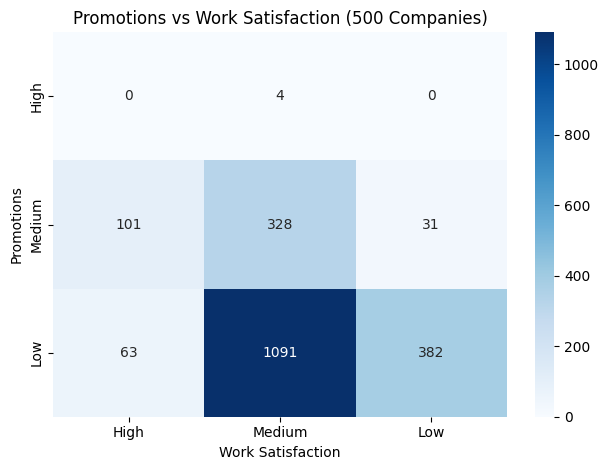

In [73]:
sns.heatmap(pd.crosstab(ambition['Promotions'], ambition['Work Satisfaction'])
            .reindex(index=['High', 'Medium', 'Low'], columns=['High', 'Medium', 'Low']),
            annot=True, fmt='d', cmap='Blues')
plt.title("Promotions vs Work Satisfaction (500 Companies)")
plt.tight_layout()
plt.show()

# What We Observed from 2000 Companies (Promotions vs Work Satisfaction)

- **Low promotions with medium work satisfaction (1,091 companies)** show that many employees remain neutral about their jobs even when growth opportunities are limited.

- **Low promotions with low work satisfaction (382 companies)** clearly indicate that lack of career growth often leads to dissatisfaction and reduced morale.

- **Medium promotions with medium work satisfaction (328 companies)** suggest that average career progression generally results in average employee satisfaction.

- **Medium promotions with high work satisfaction (101 companies)** prove that work culture, leadership, and job security can compensate for slower promotions.

- **High promotions are extremely rare (only 4 companies)**, and none combine high promotions with high satisfaction, highlighting limited fast-track career growth across organizations.

- **High or medium satisfaction despite low promotions** reinforces the idea that career growth is important—but not the only driver of employee happiness.

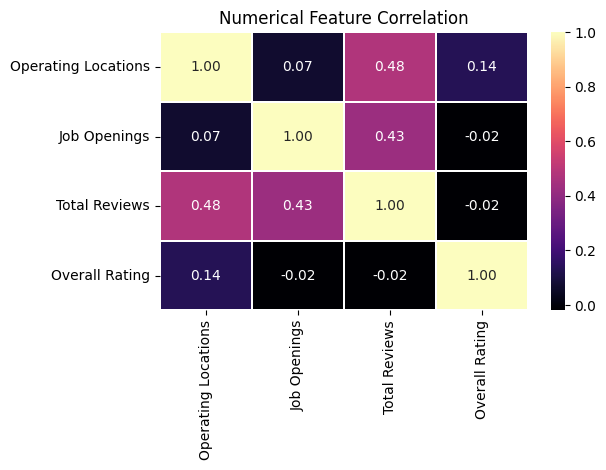

In [74]:
corr = ambition[['Operating Locations', 'Job Openings', 'Total Reviews', 'Overall Rating']].corr()

sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.3)
plt.title('Numerical Feature Correlation')
plt.tight_layout()
plt.show()

# Key Observations from Correlation Analysis

- **Operating Locations vs Total Reviews → 0.48 (Moderate Positive)**  
  Companies with a wider geographic presence tend to receive more employee reviews, suggesting that larger operational reach increases workforce size and public visibility.

- **Job Openings vs Total Reviews → 0.43 (Moderate Positive)**  
  Organizations with higher hiring activity generally attract more reviews, indicating that active recruitment drives employee engagement and feedback volume.

- **Operating Locations vs Job Openings → 0.07 (Very Weak Positive)**  
  While larger companies often hire more, the relationship is weak, showing that geographic expansion does not always translate into aggressive hiring.

- **Operating Locations vs Overall Rating → 0.14 (Weak Positive)**  
  Expanding across locations has minimal influence on employee satisfaction, suggesting that company size alone does not strongly impact overall ratings.

- **Job Openings vs Overall Rating → -0.02 (Negligible Negative)**  
  Hiring frequency shows almost no relationship with employee satisfaction, indicating that growth phases neither significantly improve nor harm workplace sentiment.

- **Total Reviews vs Overall Rating → -0.02 (Negligible Negative)**  
  A higher number of reviews does not correspond to higher ratings, implying that review volume reflects participation levels rather than employee happiness.

### Top 10 industries by company count with High, Medium and Low Job Security

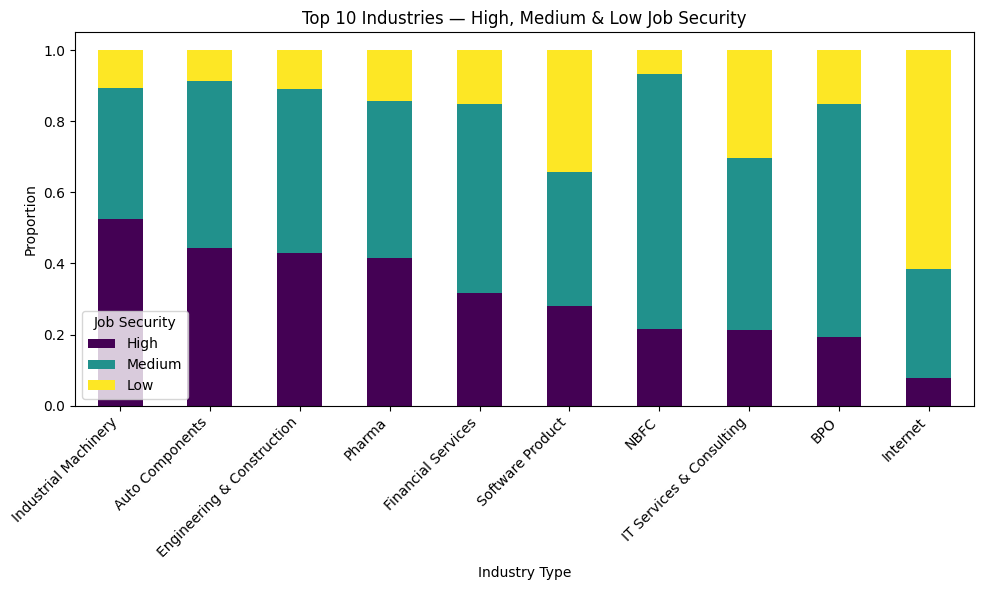

In [75]:
top10 = ambition['Industry Type'].value_counts().head(10).index


job_sec = pd.crosstab(
    ambition['Industry Type'],
    ambition['Job Security'],
    normalize='index'
)[['High','Medium', 'Low']]


job_sec_top10 = job_sec.loc[top10]


job_sec_top10_sorted = job_sec_top10.sort_values(by='High', ascending=False)


job_sec_top10_sorted.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(10,6)
)
plt.title('Top 10 Industries — High, Medium & Low Job Security')
plt.ylabel('Proportion')
plt.xlabel('Industry Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Get the top 10 industries by company count

In [76]:
job_sec_top10_sorted

Job Security,High,Medium,Low
Industry Type,,,
Industrial Machinery,0.526316,0.368421,0.105263
Auto Components,0.444444,0.470085,0.085470
Engineering & Construction,0.430000,0.460000,0.110000
Pharma,0.415584,0.441558,0.142857
Financial Services,0.318182,0.530303,0.151515
Software Product,0.281250,0.375000,0.343750
NBFC,0.216216,0.716216,0.067568
IT Services & Consulting,0.212000,0.484000,0.304000
BPO,0.191781,0.657534,0.150685


In [77]:
ambition.head()

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Job Security,Work Life Balance,Work Satisfaction,Promotions
0,TCS,IT Services & Consulting,Bangalore,440,2100,110000,3.3,High,Medium,Low,Low
1,Accenture,IT Services & Consulting,Bangalore,256,40600,71300,3.7,Medium,Medium,Low,Low
2,Wipro,IT Services & Consulting,Hyderabad,371,6900,63500,3.6,Medium,Medium,Low,Low
3,Cognizant,IT Services & Consulting,Hyderabad,230,709,59800,3.6,Medium,Medium,Low,Low
4,Capgemini,IT Services & Consulting,Bangalore,184,1900,51400,3.7,High,High,Medium,Low


### Desired order for categorical levels

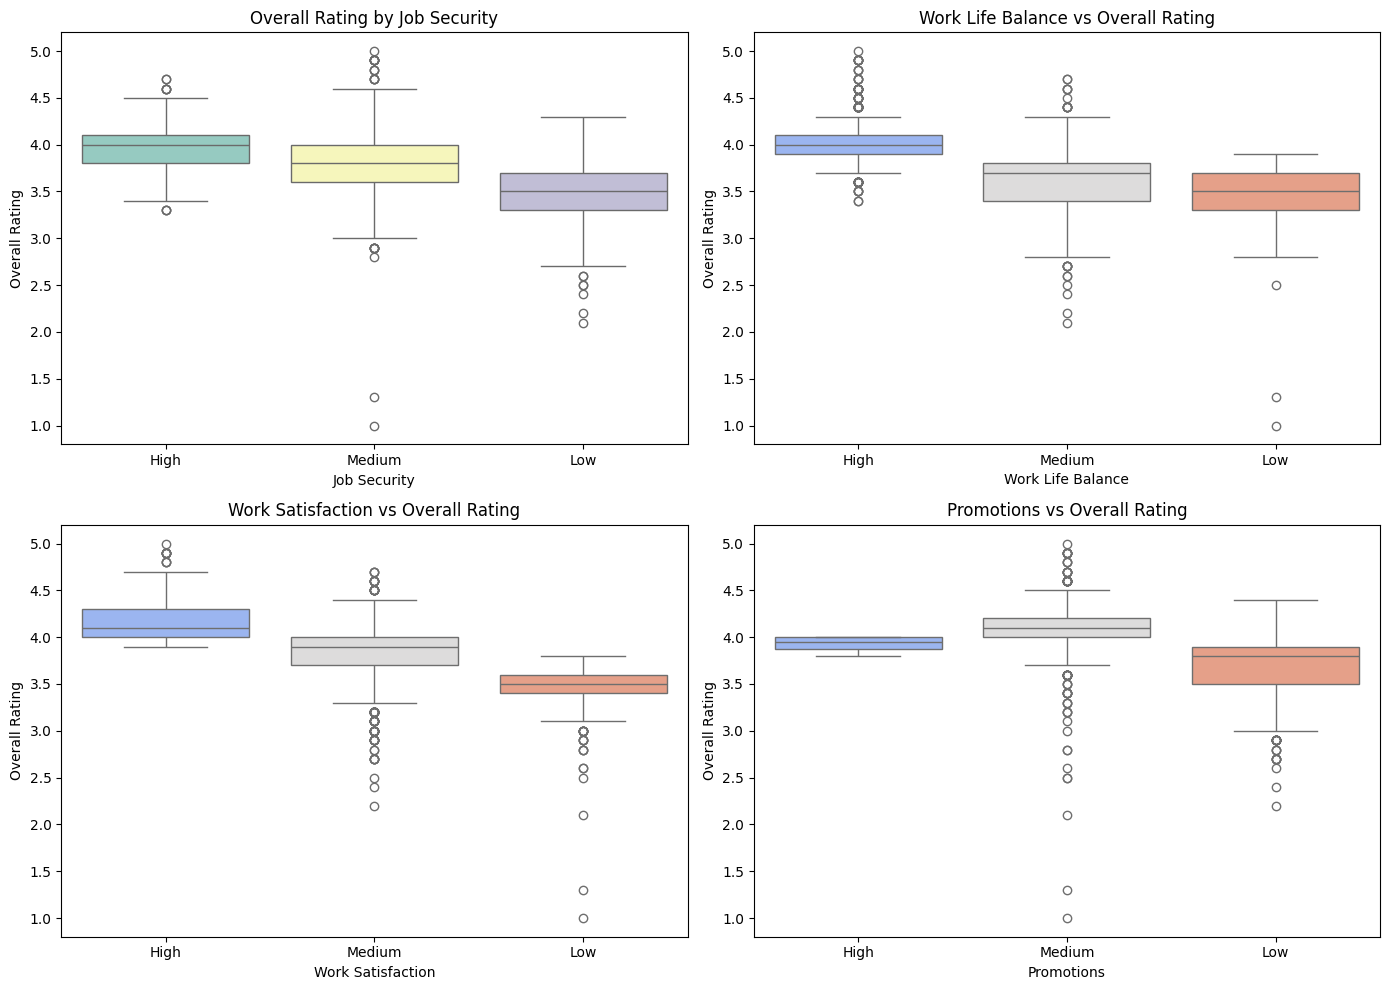

In [78]:
rating_order = ['High', 'Medium', 'Low']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))


sns.boxplot(data=ambition, x='Job Security', y='Overall Rating',
            order=rating_order, palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Overall Rating by Job Security')


sns.boxplot(data=ambition, x='Work Life Balance', y='Overall Rating',
            order=rating_order, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Work Life Balance vs Overall Rating')


sns.boxplot(data=ambition, x='Work Satisfaction', y='Overall Rating',
            order=rating_order, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Work Satisfaction vs Overall Rating')


sns.boxplot(data=ambition, x='Promotions', y='Overall Rating',
            order=rating_order, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Promotions vs Overall Rating')

plt.tight_layout()
plt.show()

# Key Insights from Relationship Analysis (Overall Rating vs Employee Factors)

##### 1. Job Security vs Overall Rating

Companies rated High in Job Security show higher median ratings with less variability, indicating consistent employee satisfaction.

Low Job Security companies display greater spread and lower median ratings, reflecting instability in employee sentiment.

Insight: Job security plays a stable and positive role in shaping overall employee satisfaction.

##### 2. Work-Life Balance vs Overall Rating

A clear upward trend is visible from Low → Medium → High in overall ratings.

Companies with High Work-Life Balance exhibit higher and more consistent ratings, with fewer negative outliers.

Insight: Work-life balance is a strong and reliable predictor of employee happiness.

##### 3. Work Satisfaction vs Overall Rating

The widest variation in ratings appears in the Low and Medium satisfaction groups, indicating mixed employee perceptions.

Overall ratings increase significantly only when Work Satisfaction is High.

Insight: High satisfaction strongly boosts employee perception, while low-to-medium levels produce inconsistent responses.

##### 4. Promotions vs Overall Rating

Overall ratings remain tightly clustered across all promotion levels, with no dramatic increase even at higher promotion ratings.

High promotion ratings do not translate into proportionally higher overall satisfaction.

Insight: Promotions alone do not guarantee employee satisfaction unless supported by other positive workplace factors.

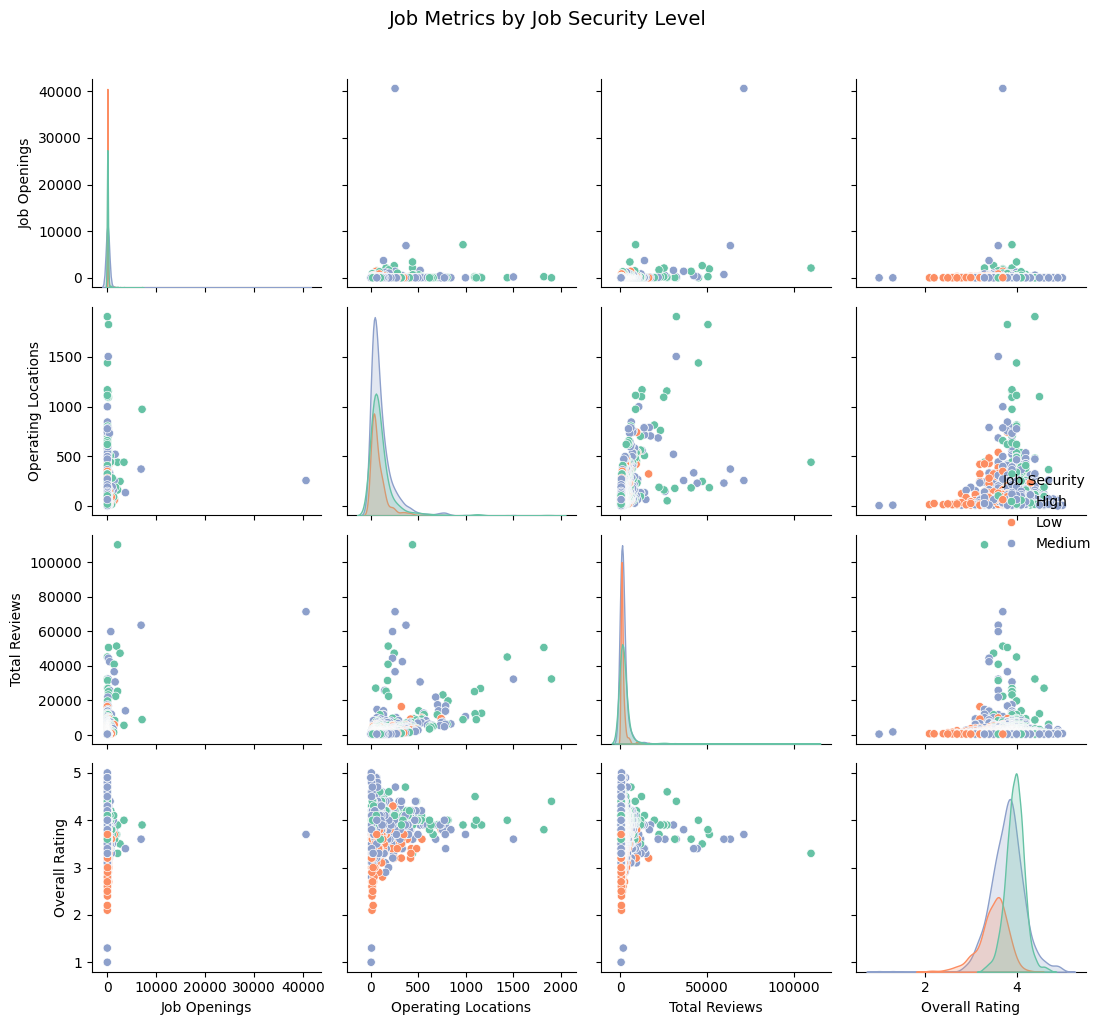

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


ambition['Job Security'] = ambition['Job Security'].astype('category')


sns.pairplot(
    ambition,
    vars=['Job Openings', 'Operating Locations', 'Total Reviews', 'Overall Rating'],
    hue='Job Security',
    palette='Set2',         
    diag_kind='kde'         
)


plt.suptitle('Job Metrics by Job Security Level', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Key Insights from Job Metrics by Job Security Level

- **Job Openings show extreme variability across all job security levels**, with a strong right-skew and a few very large outliers, indicating that mass hiring is limited to a small number of companies regardless of perceived job security.

- **Companies with High Job Security generally cluster around moderate job openings**, suggesting that stable organizations tend to hire steadily rather than aggressively.

- **Operating Locations increase noticeably for companies with Medium and High Job Security**, implying that geographically diversified companies are more likely to offer stable employment.

- **Total Reviews are significantly higher for companies with Medium and High Job Security**, reflecting larger employee bases and stronger employee participation in feedback platforms.

- **Overall Ratings are consistently higher and more tightly grouped for High Job Security companies**, while Low Job Security firms show lower ratings and greater spread, highlighting instability in employee sentiment.

## Top 10 Companies with Most Job Openings

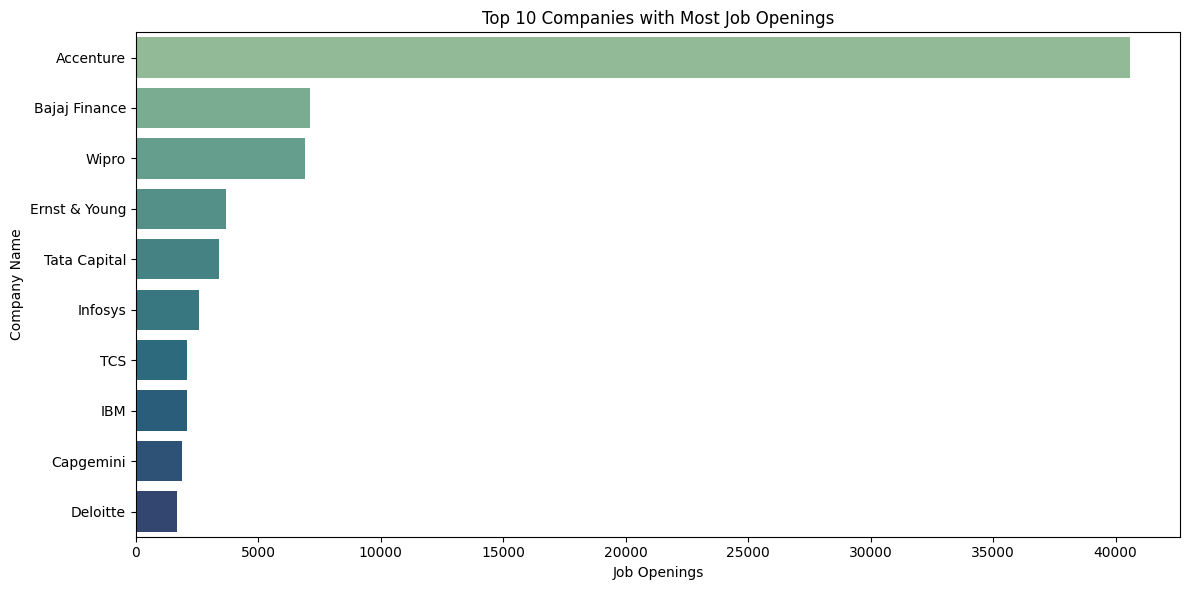

In [80]:
top10_openings = ambition[["Company Name", "Job Openings"]].sort_values(by="Job Openings", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_openings, y="Company Name", x="Job Openings", palette="crest")
plt.title("Top 10 Companies with Most Job Openings")
plt.xlabel("Job Openings")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

# Key Insights from Top 10 Companies with Most Job Openings

- **Accenture dominates the hiring landscape by a wide margin**, indicating aggressive expansion and large-scale recruitment, especially in consulting and technology services.

- **The gap between Accenture and the remaining companies is significant**, showing that most organizations are hiring at a far more measured pace.

- **Companies like Bajaj Finance, Wipro, and Ernst & Young form the second tier of hiring activity**, reflecting steady growth across finance, IT, and professional services.

- **Traditional IT giants such as Infosys, TCS, IBM, and Capgemini continue to recruit**, but with comparatively smaller volumes, suggesting selective or role-specific hiring strategies.

- **The presence of both technology and financial firms highlights diverse hiring demand**, indicating that employment opportunities extend beyond a single industry.

## Top 10 Industries by Total Job Openings

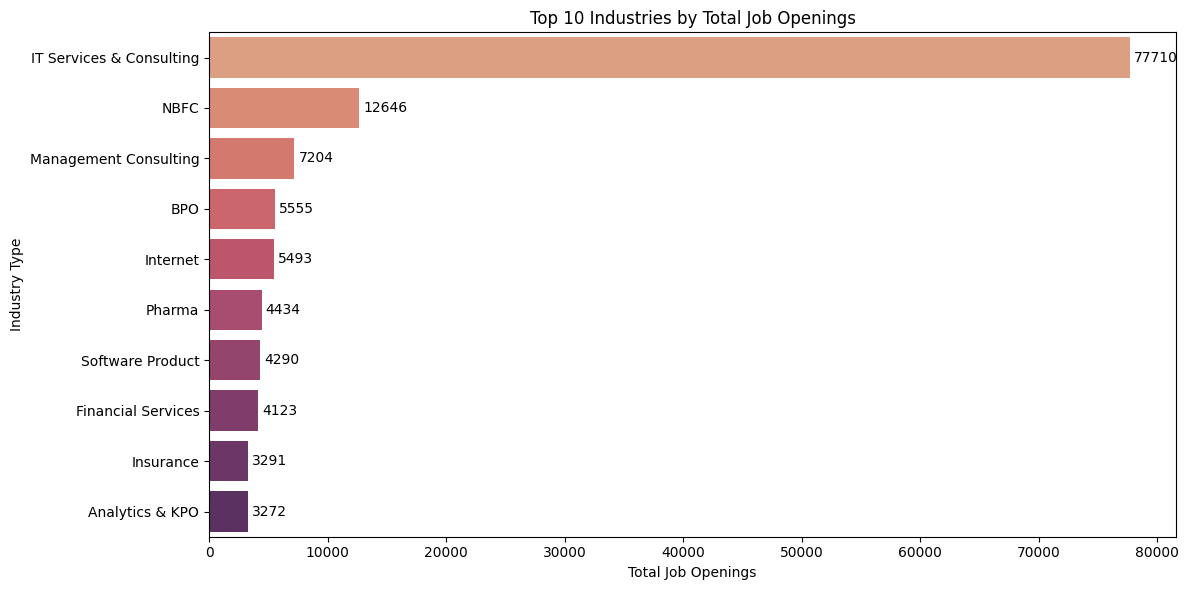

In [81]:
ambition = pd.read_csv(r"D:\Web Scraping\ambitionbox_cleaned_dataset.csv")
top10_industries = (
    ambition.groupby("Industry Type")["Job Openings"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


plt.figure(figsize=(12,6))
ax = sns.barplot(data=top10_industries, y="Industry Type", x="Job Openings", palette="flare")

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.title("Top 10 Industries by Total Job Openings")
plt.xlabel("Total Job Openings")
plt.ylabel("Industry Type")
plt.tight_layout()
plt.show()

# Key Insights from Top 10 Industries by Total Job Openings

- **IT Services & Consulting overwhelmingly dominates hiring demand**, reflecting massive workforce requirements driven by digital transformation, IT services expansion, and consulting-led growth.

- **NBFC and Management Consulting emerge as the next strongest hiring sectors**, indicating robust demand in finance-driven services and advisory roles.

- **Internet and BPO sectors show strong hiring momentum**, highlighting continued growth in digital platforms, customer support, and outsourced services.

- **Pharma and Software Product industries maintain steady recruitment**, suggesting ongoing investment in healthcare, innovation, and product-based technology companies.

- **Financial Services, Insurance, and Analytics & KPO round out the top industries**, emphasizing data-driven decision-making and sustained growth in the financial ecosystem.

## Top 10 IT Services & Consulting Companies by Job Openings

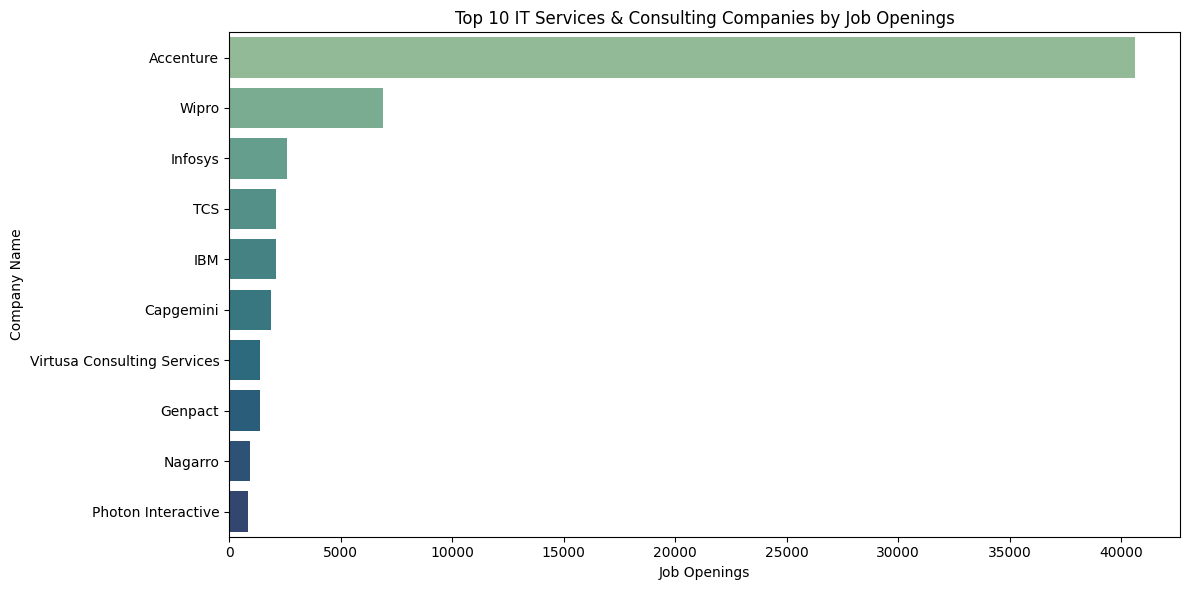

In [82]:
it_df = ambition[ambition["Industry Type"] == "IT Services & Consulting"]


top10_openings_it = (
    it_df[["Company Name", "Job Openings"]]
    .sort_values(by="Job Openings", ascending=False)
    .drop_duplicates("Company Name")
    .head(10)
)


plt.figure(figsize=(12,6))
sns.barplot(data=top10_openings_it, x="Job Openings", y="Company Name", palette="crest")

plt.title("Top 10 IT Services & Consulting Companies by Job Openings")
plt.xlabel("Job Openings")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

# Key Insights from Top IT Services & Consulting Companies by Job Openings

- **Accenture overwhelmingly dominates hiring in the IT Services & Consulting sector**, reflecting large-scale digital transformation projects and aggressive global expansion.

- **Wipro, Infosys, and TCS follow at a distant level**, indicating steady but significantly lower hiring volumes compared to the market leader.

- **IBM and Capgemini continue to recruit consistently**, suggesting ongoing demand for enterprise technology, cloud, and consulting services.

- **Mid-sized firms such as Virtusa Consulting Services, Genpact, Nagarro, and Photon Interactive** show active hiring, highlighting strong growth opportunities beyond the largest multinational players.

- **Hiring demand is distributed across both global giants and niche technology firms**, demonstrating a broad and diversified talent market within the IT services ecosystem.

## Top 10 Companies with max overall rating

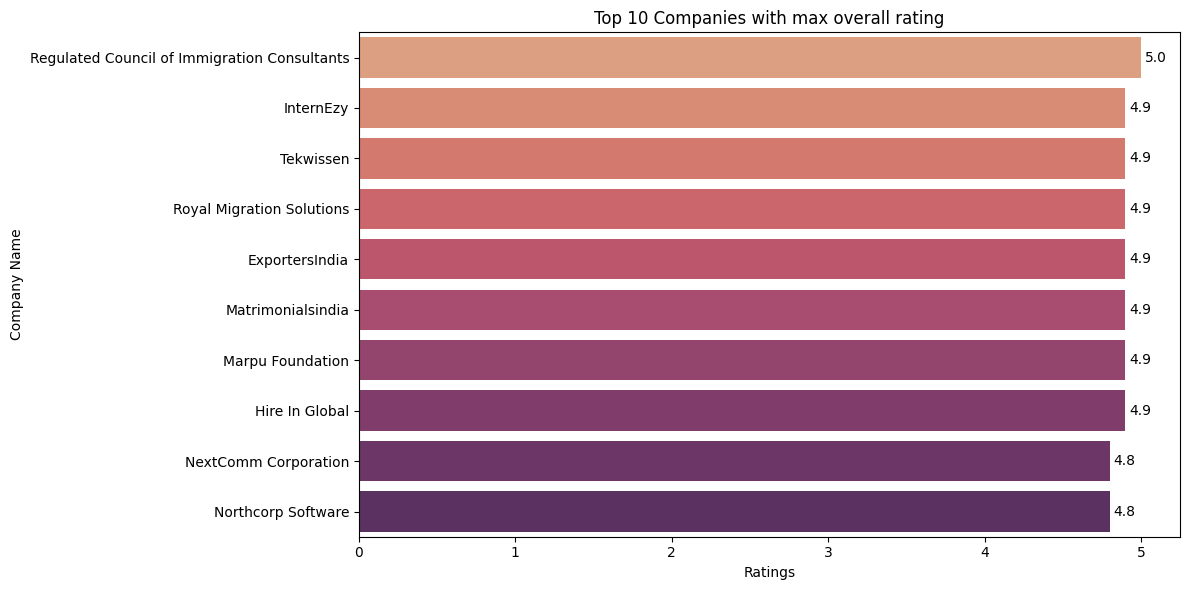

In [83]:
top10_companies=ambition.groupby("Company Name")["Overall Rating"].max().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
ax1 = sns.barplot(data=top10_companies, y="Company Name", x="Overall Rating", palette="flare")
for container in ax1.containers:
    labels = [f"{bar.get_width():.1f}" for bar in container]
    ax1.bar_label(container, labels=labels, label_type="edge", padding=3)

plt.title("Top 10 Companies with max overall rating")
plt.xlabel("Ratings")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

# Key Insights from Top 10 Companies by Overall Rating

- **Regulated Council of Immigration Consultants tops the list with a perfect 5.0 rating**, indicating exceptionally high employee satisfaction and workplace standards.

- **Several companies—including InternEzy, Tekwissen, Royal Migration Solutions**, and ExportersIndia—closely follow with ratings of 4.9, showing consistently strong employee sentiment across these organizations.

- **Both service-oriented and technology-driven firms appear in the top rankings**, suggesting that high employee satisfaction is achievable across different business models.

- **Non-profit and foundation-based organizations like Marpu Foundation also score very high**, highlighting that mission-driven work environments can significantly enhance employee satisfaction.

- **The presence of diverse sectors—consulting, migration services, technology, and social organization**s—demonstrates that top-rated workplaces are not limited to a single industry.

## Top 10 Industries with average overall rating

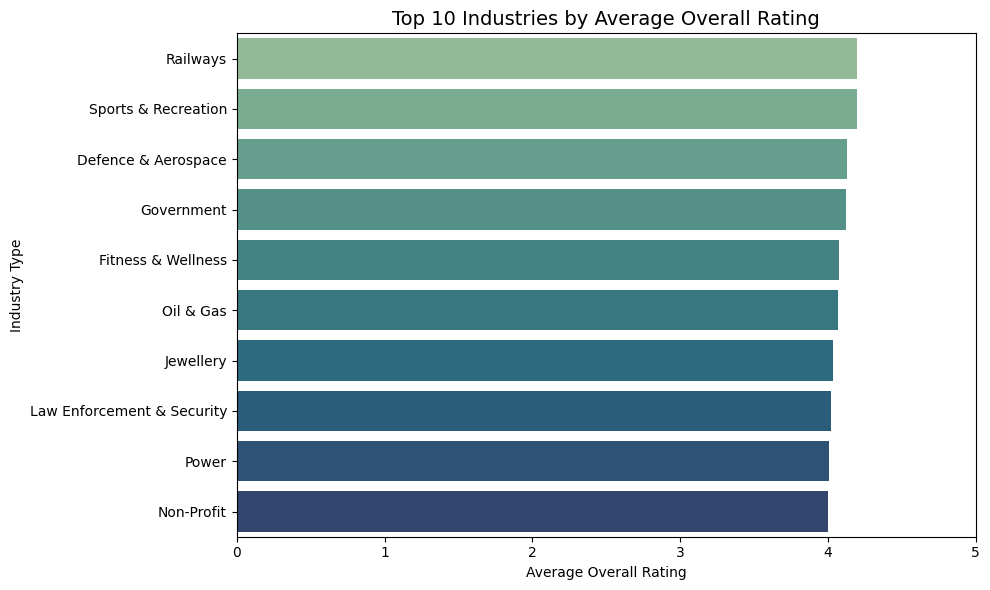

In [84]:
top_industries = (
    ambition.groupby('Industry Type')['Overall Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_industries,
    x='Overall Rating',
    y='Industry Type',
    palette='crest'  
)


plt.title("Top 10 Industries by Average Overall Rating", fontsize=14)
plt.xlabel("Average Overall Rating")
plt.ylabel("Industry Type")
plt.xlim(0, 5) 
plt.tight_layout()
plt.show()

# Key Insights from Top 10 Industries by Average Overall Rating

- **Railways leads all industries in average overall rating**, indicating very high employee satisfaction and strong organizational stability.

- **Sports & Recreation and Defence & Aerospace closely follow**, suggesting that structured work environments and purpose-driven roles contribute positively to employee sentiment.

- **Government and Law Enforcement & Security industries consistently score high**, reflecting job security, structured growth, and long-term employment benefits.

- **Fitness & Wellness and Non-Profit sectors also appear among the top-rated industries**, highlighting that mission-oriented and health-focused workplaces foster strong employee satisfaction.

- **Industries such as Oil & Gas, Power, and Jewellery maintain high average ratings**, indicating that traditional and capital-intensive sectors can also deliver positive work experiences.

## Top Hiring Company in Each of the Top 10 Industries

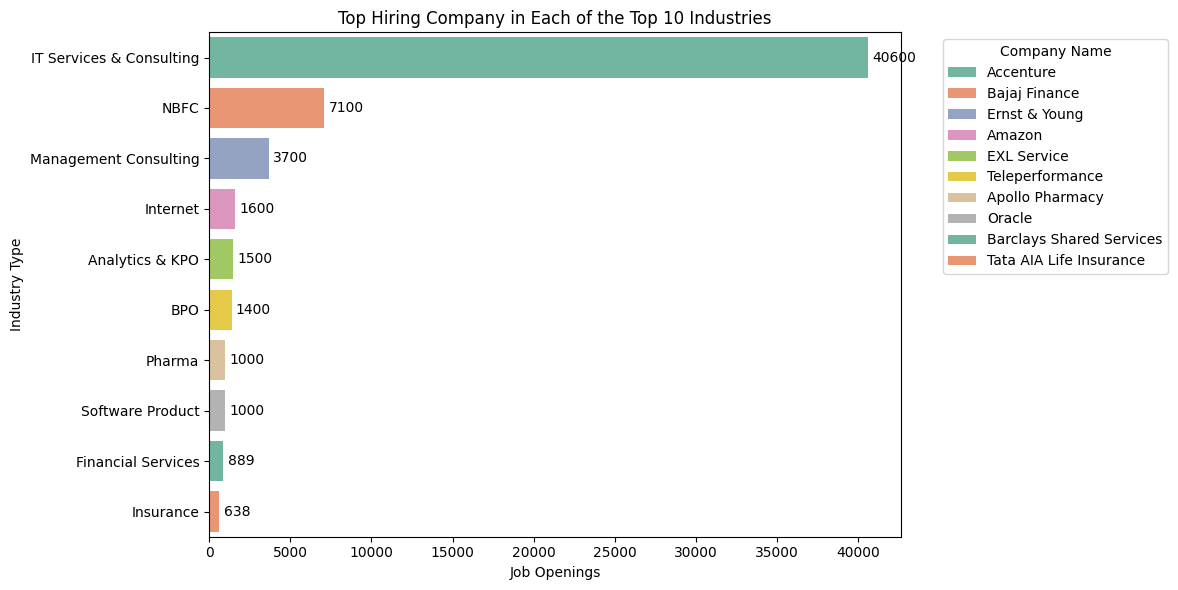

In [86]:
top10_industries = (
    ambition.groupby("Industry Type", observed=True)["Job Openings"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


filtered_df = ambition[ambition["Industry Type"].isin(top10_industries)]


top_companies_in_industries = (
    filtered_df.loc[
        filtered_df.groupby("Industry Type", observed=True)["Job Openings"].idxmax()
    ]
    .sort_values("Job Openings", ascending=False)
)


plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_companies_in_industries,
    y="Industry Type",
    x="Job Openings",
    hue="Company Name",
    dodge=False,
    palette="Set2"
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)


plt.title("Top Hiring Company in Each of the Top 10 Industries")
plt.xlabel("Job Openings")
plt.ylabel("Industry Type")
plt.legend(title="Company Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Key Insights from Top Hiring Company in Each of the Top 10 Industries

- **IT Services & Consulting is overwhelmingly led by Accenture, with 40,600 job openings**, showing massive hiring demand and clear dominance within the industry.

- **In the NBFC sector, Bajaj Finance stands out as the top hiring company**, indicating strong growth momentum in financial lending and services.

- **Management Consulting is led by Ernst & Young**, reflecting consistent demand for advisory, audit, and consulting roles.

- **Amazon dominates hiring in the Internet industry**, highlighting continued expansion in e-commerce, cloud, and digital services.

- **Analytics & KPO and BPO sectors are driven by EXL Service and Teleperformance**, emphasizing strong demand for data analytics, outsourcing, and customer operations roles.

- **Pharma and Software Product industries show moderate hiring levels**, led by Apollo Pharmacy and Oracle, suggesting steady but controlled recruitment.

- **Financial Services and Insurance industries record comparatively lower hiring volumes**, led by Barclays Shared Services and Tata AIA Life Insurance, indicating selective and specialized hiring strategies.

## Top 10 Industry by Total Reviews

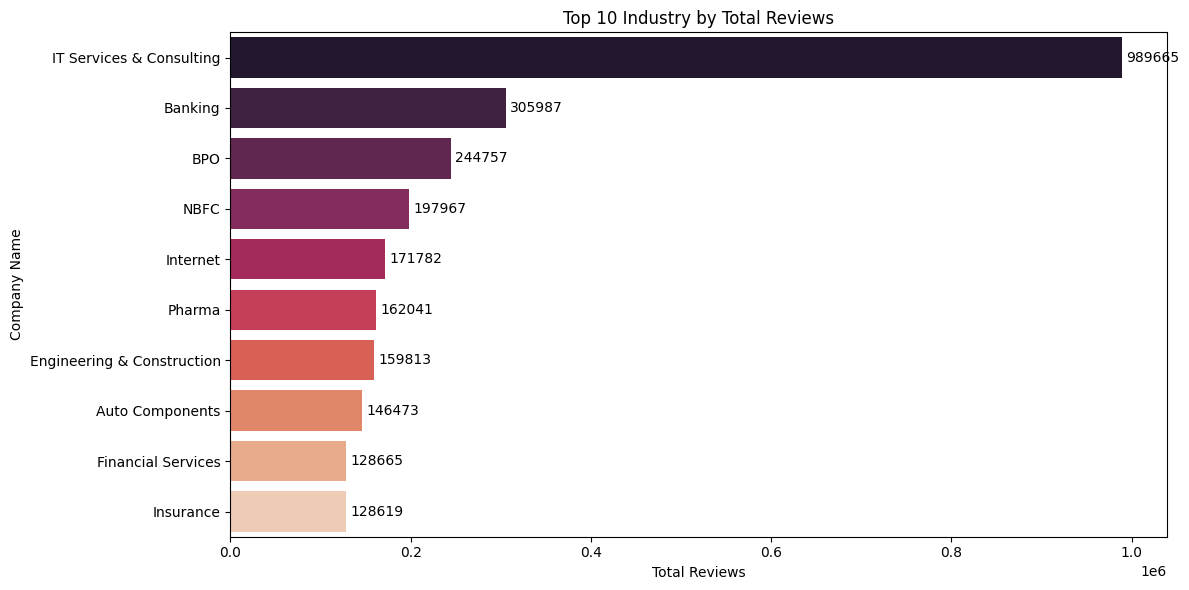

,Industry Type,Total Reviews
0,IT Services & Consulting,989665
1,Banking,305987
2,BPO,244757
3,NBFC,197967
4,Internet,171782
5,Pharma,162041
6,Engineering & Construction,159813
7,Auto Components,146473
8,Financial Services,128665
9,Insurance,128619


In [87]:
top10_reviews = (
    ambition.groupby("Industry Type")["Total Reviews"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)


plt.figure(figsize=(12,6))
ax = sns.barplot(data=top10_reviews, y="Industry Type", x="Total Reviews", palette="rocket")


for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, label_type="edge")

plt.title("Top 10 Industry by Total Reviews")
plt.xlabel("Total Reviews")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()
top10_reviews

# Key Insights from Top 10 Industries by Total Reviews

- **IT Services & Consulting overwhelmingly dominates total reviews**, with nearly 1 million reviews, indicating very high employee participation and visibility in this sector.

- **Banking stands as a distant second**, showing that financial institutions generate significant employee feedback, though far less compared to IT services.

- **BPO and NBFC industries follow closely**, reflecting large workforce sizes and strong engagement levels, typical of service-heavy sectors.

- **Internet and Pharma industries record substantial review volumes**, highlighting active employee voices in both digital and healthcare-driven domains.

- **Engineering & Construction and Auto Components maintain moderate review counts**, suggesting steady but less vocal employee participation compared to service sectors.

- **Financial Services and Insurance round out the top 10**, indicating consistent yet comparatively lower engagement on review platforms.

## High Job Security in Top 10 Industries

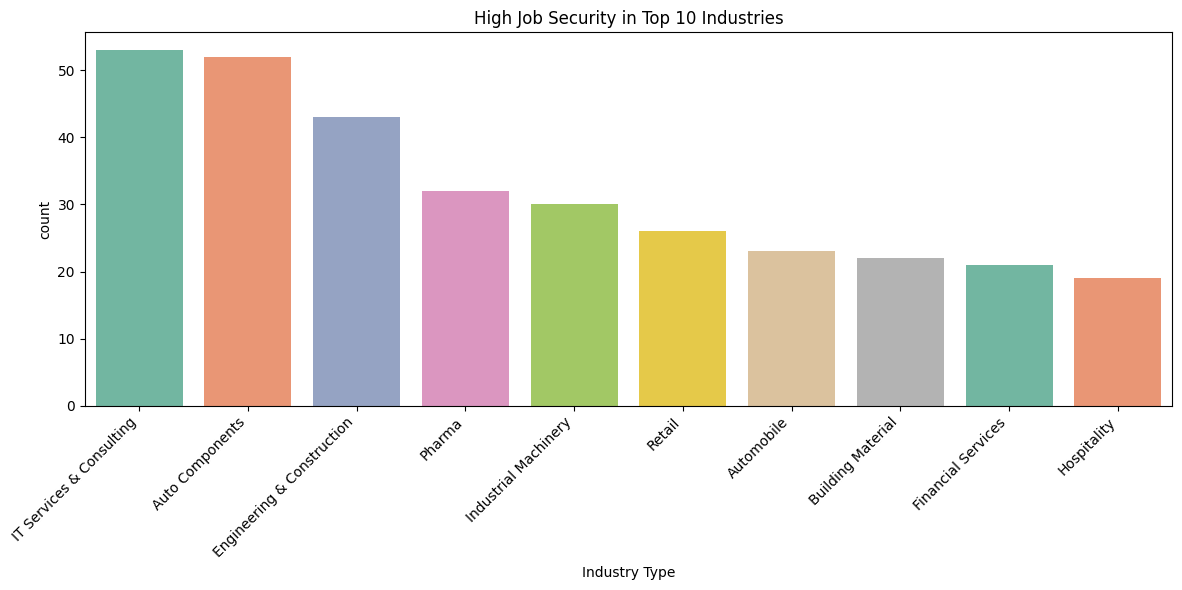

In [88]:
high_df = ambition[ambition['Job Security'] == 'High']

top10 = high_df['Industry Type'].value_counts().index[:10]

plt.figure(figsize=(12, 6))
sns.countplot(data=high_df, x='Industry Type', order=top10, palette='Set2')
plt.title('High Job Security in Top 10 Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Key Insights from High Job Security in Top 10 Industries

- **IT Services & Consulting records the highest count of companies with high job security**, indicating strong employment stability in large-scale technology and consulting firms.

- **Auto Components closely follows**, suggesting manufacturing-linked industries offer relatively secure and long-term employment opportunities.

- **Engineering & Construction shows a strong presence in high job security**, reflecting consistent demand and project-driven workforce stability.

- **Pharma and Industrial Machinery maintain moderate levels of job security**, highlighting steady employment backed by healthcare demand and industrial growth.

- **Retail, Automobile, and Building Material industries show comparatively lower—but still notable—job security**, suggesting moderate stability influenced by market cycles.

- **Financial Services and Hospitality record the lowest counts among the top industries**, indicating higher sensitivity to economic fluctuations and business cycles.

## Qualitative Workplace Ratings Heatmap

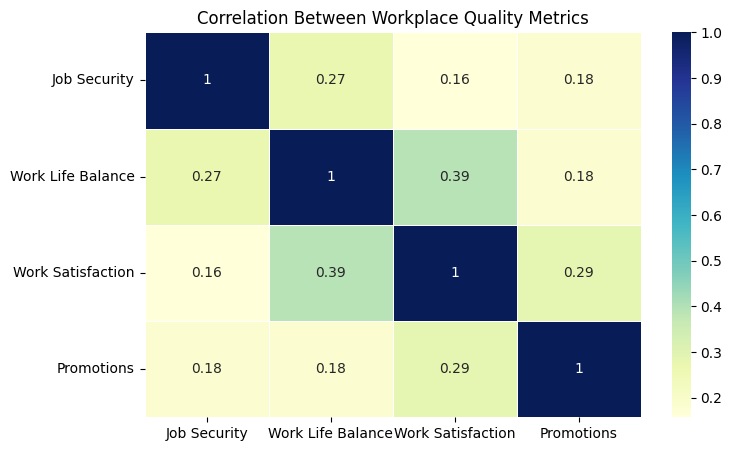

In [89]:
rating_map = {'High': 3, 'Medium': 2, 'Low': 1}
df_mapped = df[['Job Security', 'Work Life Balance', 'Work Satisfaction', 'Promotions']].replace(rating_map)

plt.figure(figsize=(8, 5))
sns.heatmap(df_mapped.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Between Workplace Quality Metrics")
plt.show()

# Key Insights from Correlation Between Workplace Quality Metrics

- **Work-Life Balance and Work Satisfaction show the strongest positive relationship (0.39)**, indicating that employees who experience better work-life balance are significantly more satisfied with their jobs.

- **Promotions have a moderate correlation with Work Satisfaction (0.29)**, suggesting that career growth contributes to satisfaction but is not the sole driver of employee happiness.

- **Job Security is weakly correlated with Work-Life Balance (0.27)**, implying that stable employment slightly improves employees’ ability to maintain a balanced personal and professional life.

- **Job Security has only a weak relationship with Work Satisfaction (0.16)**, indicating that feeling secure in a role does not automatically translate into higher day-to-day satisfaction.

- **Promotions show weak correlations with Job Security and Work-Life Balance (0.18 each)**, highlighting that promotion opportunities operate somewhat independently of stability and balance factors.

## Which are the top 10 cities where most companies are located

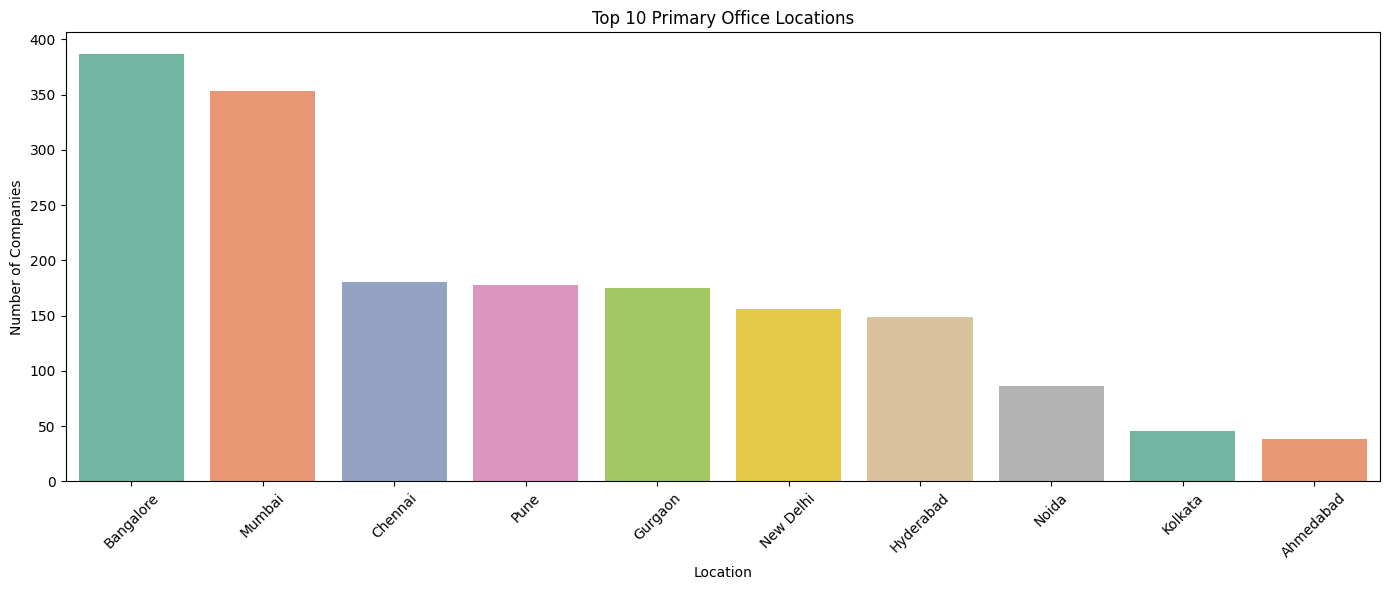

In [93]:
top_locations = ambition['Primary Office Location'].value_counts().head(10)


plt.figure(figsize=(14, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="Set2")
plt.title("Top 10 Primary Office Locations")
plt.xlabel("Location")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Key Insights from Top 10 Primary Office Locations

- **Metro tech hubs dominate the corporate landscape** — Bangalore, Mumbai, Chennai, Pune, and Hyderabad host the majority of company headquarters, reinforcing their role as India’s primary technology and business centers.

- **Hiring hotspots are concentrated in major metros** — Job seekers have the highest opportunities in these cities, where corporate density and employment demand are strongest.

- **Secondary hubs like Gurgaon and New Delhi show steady corporate presence**, indicating expanding opportunities beyond traditional metro centers.

- **Cities such as Noida, Kolkata, and Ahmedabad have comparatively fewer headquarters**, suggesting emerging but still developing corporate ecosystems.

## How are companies distributed across job security, work-life balance, work satisfaction, and promotions

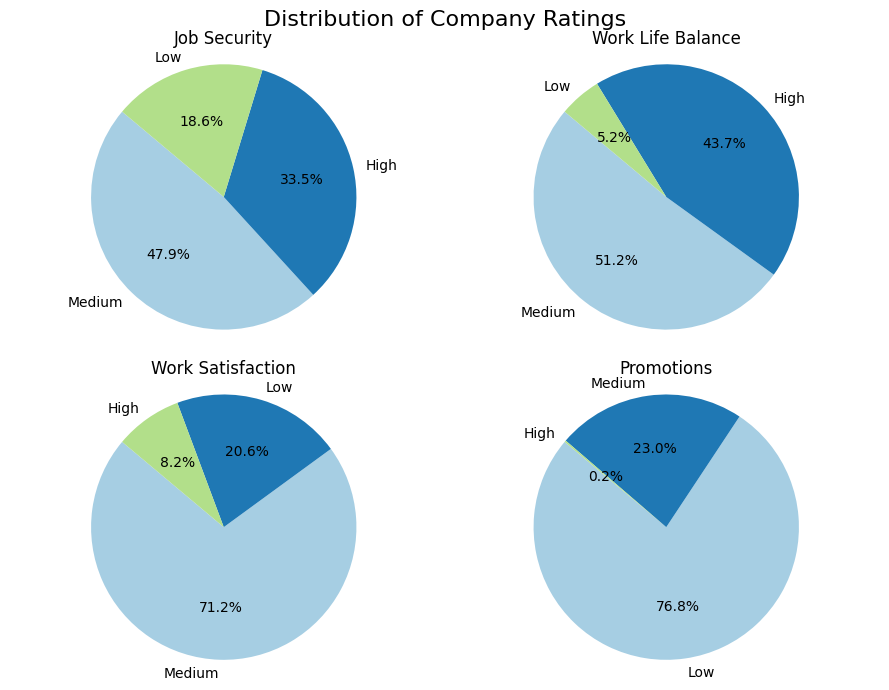

In [96]:
import matplotlib.pyplot as plt

rating_columns = ["Job Security", "Work Life Balance", "Work Satisfaction", "Promotions"]

custom_colors = ['#a6cee3', '#1f78b4', '#b2df8a'] 

fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()

for i, col in enumerate(rating_columns):
    counts = ambition[col].value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=custom_colors[:len(counts)]
    )
    axes[i].set_title(col)
    axes[i].axis('equal')

plt.suptitle("Distribution of Company Ratings", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Key Insights from Distribution of Company Ratings

- **Job Security is mostly rated as Medium (47.9%), followed by High (33.5%)**, indicating that most companies offer reasonable job stability, but fewer provide very strong security.

- **Work-Life Balance shows a healthy distribution, with High ratings (43.7%) and Medium ratings (51.2%)** dominating, suggesting that work-life balance is one of the stronger aspects across companies.

- **Work Satisfaction is heavily concentrated in the Medium category (71.2%), while High satisfaction remains low (8.2%)**, showing that employees are generally okay with their jobs but rarely highly satisfied.

- **Promotions are overwhelmingly rated as Low (76.8%), with High promotions being almost negligible (0.2%)**, clearly indicating that career growth and appraisal opportunities are the weakest area across organizations.

# Hypothesis Testing

### Hypothesis : Promotions vs Work Satisfaction

- **Null Hypothesis (H₀):** There is no significant relationship between promotion opportunities and work satisfaction.

- **Alternative Hypothesis (H₁):**  There is a significant relationship between promotion opportunities and work satisfaction.

- **Test Used:**  Chi-Square Test of Independence (categorical vs categorical)

In [98]:
from scipy.stats import chi2_contingency

promo_vs_satisfaction = pd.crosstab(
    ambition["Promotions"],
    ambition["Work Satisfaction"]
)

chi2, p_value, dof, expected = chi2_contingency(promo_vs_satisfaction)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Promotions significantly influence Work Satisfaction")
else:
    print("Fail to Reject H0")

Chi-Square Statistic: 195.60262593243394
P-value: 3.3127767677031326e-41
Reject H0: Promotions significantly influence Work Satisfaction


### Hypothesis : Job Security vs Overall Rating

- **Null Hypothesis (H₀):** Job security has no significant effect on overall company ratings.

- **Alternative Hypothesis (H₁):**  Job security has a significant effect on overall company ratings.

- **Test Used:**  One-Way ANOVA (categorical vs numerical)

In [99]:
from scipy.stats import f_oneway

high_js = ambition[ambition["Job Security"] == "High"]["Overall Rating"]
medium_js = ambition[ambition["Job Security"] == "Medium"]["Overall Rating"]
low_js = ambition[ambition["Job Security"] == "Low"]["Overall Rating"]

f_stat, p_value = f_oneway(high_js, medium_js, low_js)

print("F-Statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Job Security significantly affects Overall Rating")
else:
    print("Fail to Reject H0")

F-Statistic: 281.9759356353575
P-value: 1.3762051495146653e-108
Reject H0: Job Security significantly affects Overall Rating


### Hypothesis : Work-Life Balance vs Overall Rating

- **Null Hypothesis (H₀):** Work-life balance does not significantly affect overall ratings.

- **Alternative Hypothesis (H₁):**  Work-life balance significantly affects overall ratings.

- **Test Used:**  One-Way ANOVA

In [101]:
high_wlb = ambition[ambition["Work Life Balance"] == "High"]["Overall Rating"]
medium_wlb = ambition[ambition["Work Life Balance"] == "Medium"]["Overall Rating"]
low_wlb = ambition[ambition["Work Life Balance"] == "Low"]["Overall Rating"]

f_stat, p_value = f_oneway(high_wlb, medium_wlb, low_wlb)

print("F-Statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: Work-Life Balance significantly affects Overall Rating")
else:
    print("Fail to Reject H0")

F-Statistic: 491.6532708508697
P-value: 2.3875535096669215e-174
Reject H0: Work-Life Balance significantly affects Overall Rating
